**MEDICAL INSURANCE COST PREDICTION**

Hospital ABC, a leading healthcare provider, aims to optimize its resource allocation and improve patient care by understanding the factors influencing medical costs for its patients. To achieve this, Hospital ABC has collected a comprehensive dataset containing information about patients' demographics, lifestyle, health status, and medical expenses etc. The dataset includes attributes such as age, gender, BMI, smoking status, region, as well as additional information like occupation, exercise frequency, chronic conditions, and more.

**PROBLEM STATEMENT**

To predict medical costs for patients based on demographic factors, lifestyle-related information, health status, insurance plan type, family medical history, distance to the nearest hospital, and primary care physician visits.

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("/content/drive/MyDrive/DATASET/medical_data.csv") #import dataset


In [3]:
data.columns

Index(['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Region', 'Occupation',
       'Exercise_Frequency', 'Chronic_Conditions', 'Insurance_Plan_Type',
       'Marital_Status', 'Distance_to_Nearest_Hospital', 'Income_Level',
       'Family_Medical_History', 'Primary_Care_Physician_Visits',
       'Mental_Health_Status', 'Prescription_Medication_Usage',
       'Employment_Status', 'Education_Level', 'Dietary_Habits',
       'Alcohol_Consumption', 'Sleep_Quality', 'Stress_Level',
       'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare',
       'Social_Support', 'Environmental_Factors', 'Genetic_Predisposition',
       'Health_Literacy_Level', 'Comorbidities', 'Access_to_Telemedicine',
       'Emergency_Room_Visits', 'Healthcare_Utilization', 'Charges'],
      dtype='object')

In [4]:
pd.set_option('display.max_columns', None)
data.head()  #First five rows of the dataset

,Age,Sex,BMI,Children,Smoker,Region,Occupation,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,Marital_Status,Distance_to_Nearest_Hospital,Income_Level,Family_Medical_History,Primary_Care_Physician_Visits,Mental_Health_Status,Prescription_Medication_Usage,Employment_Status,Education_Level,Dietary_Habits,Alcohol_Consumption,Sleep_Quality,Stress_Level,Medication_Adherence,Physical_Activity,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine,Emergency_Room_Visits,Healthcare_Utilization,Charges
0,56.0,Male,26.78763,0.0,No,East,White Collar,Daily,2.0,Gold,Married,12.23311,Medium,0.0,6.0,Good,Yes,Self-Employed,Graduate,Unhealthy,Moderate,Good,High,No,Active,Difficult,Weak,Good,Present,High,Yes,Unavailable,4.0,975.5380,84.78763
1,69.0,Male,22.06365,4.0,Yes,West,White Collar,Monthly,2.0,Bronze,Single,11.31495,High,0.0,2.0,Fair,No,Self-Employed,Graduate,Healthy,Moderate,Good,Medium,No,NaN,Difficult,Weak,Good,Absent,High,Yes,Available,2.0,1047.9770,92.06365
2,46.0,Female,24.03610,2.0,Yes,East,White Collar,Rarely,1.0,Silver,Single,14.29405,Medium,1.0,9.0,NaN,No,Self-Employed,College,Healthy,Moderate,Good,High,Yes,Inactive,Difficult,Strong,Good,Absent,Low,No,Unavailable,2.0,836.3854,71.03610
3,32.0,Male,24.22982,2.0,No,North,Blue Collar,Rarely,2.0,Gold,Married,18.75409,High,0.0,2.0,Good,No,Self-Employed,Graduate,Unhealthy,Moderate,Good,High,Yes,Inactive,NaN,Strong,Good,NaN,Low,No,Available,0.0,927.0653,58.22982
4,60.0,Male,31.78428,0.0,NaN,East,Blue Collar,Weekly,0.0,Silver,Single,18.24509,Low,1.0,2.0,Fair,Yes,Self-Employed,College,Unhealthy,Heavy,Poor,Medium,Yes,NaN,Easy,Weak,Poor,Present,Low,Yes,Available,2.0,1260.7970,91.78428


In [5]:
data.tail()#Last five rows of the dataset.

,Age,Sex,BMI,Children,Smoker,Region,Occupation,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,Marital_Status,Distance_to_Nearest_Hospital,Income_Level,Family_Medical_History,Primary_Care_Physician_Visits,Mental_Health_Status,Prescription_Medication_Usage,Employment_Status,Education_Level,Dietary_Habits,Alcohol_Consumption,Sleep_Quality,Stress_Level,Medication_Adherence,Physical_Activity,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine,Emergency_Room_Visits,Healthcare_Utilization,Charges
995,18.0,Male,17.79434,0.0,Yes,West,Other,Monthly,1.0,Silver,Divorced,3.480209,High,0.0,2.0,Poor,Yes,Self-Employed,Graduate,Unhealthy,Heavy,Poor,Low,Yes,Inactive,Difficult,Strong,Good,Absent,Low,Yes,Unavailable,2.0,932.2167,36.79434
996,35.0,Female,22.53824,1.0,Yes,NaN,Other,Monthly,1.0,NaN,Single,15.215190,Low,1.0,2.0,Good,No,Unemployed,Graduate,Healthy,Moderate,Good,Low,No,Active,Easy,Weak,Good,Absent,Low,Yes,Unavailable,4.0,1280.2350,58.53824
997,49.0,NaN,18.28548,4.0,No,South,Other,Monthly,2.0,Bronze,Married,0.316761,Medium,0.0,3.0,NaN,No,NaN,Graduate,Healthy,NaN,Good,High,No,Inactive,Easy,NaN,Poor,NaN,High,No,Unavailable,1.0,1336.6650,69.28548
998,64.0,Male,22.09611,2.0,No,West,White Collar,Rarely,0.0,Gold,Married,11.156200,Low,1.0,8.0,Poor,No,Unemployed,Graduate,Unhealthy,Moderate,NaN,High,Yes,Active,Difficult,Strong,Good,Present,High,Yes,Unavailable,0.0,779.2834,88.09611
999,66.0,Female,NaN,2.0,No,South,Blue Collar,Rarely,1.0,Bronze,Single,7.589228,High,1.0,NaN,Good,Yes,Unemployed,High School,Unhealthy,NaN,Poor,High,No,Inactive,Easy,Weak,Good,Absent,High,No,NaN,2.0,467.0529,NaN


In [6]:
data.shape

(1000, 35)

**Features of Dataset**

**Demographic Information:**

● Age:The age of the patient in years.

● Sex: The gender of the patient, either 'M' (male) or 'F' (female).

● BMI (Body Mass Index): A numerical value representing the body mass index of the
patient, which is calculated using their weight and height.

●Children: The number of children the patient has.

● Marital_Status: The marital status of the patient, either 'Married' or 'Single'.

● Income_Level: The income level of the patient, categorized as 'Low', 'Medium', or 'High'.

● Occupation: The occupation of the patient, which can be 'White Collar', 'Blue Collar',
'Professional', 'Student', 'Retired', or 'Self Employed'.

● Education_Level: The highest level of education attained by the patient, such as 'High
School', "Bachelor's Degree", "Master's Degree", 'PhD', or missing (NaN).

● Employment_Status: The employment status of the patient, which can be 'Employed',
'Unemployed', 'Self Employed', or missing (NaN).

**Lifestyle and Health-Related Information:**

● Exercise_Frequency: The frequency of exercise for the patient, such as 'Daily', '2
times/week', '3 times/week', 'Once a week', or 'Rarely'.

● Chronic_Conditions: Any chronic conditions the patient may have, such as 'None',
'Diabetes', 'High Blood Pressure', 'Heart Disease', or 'Arthritis'.

● Smoker: Indicates whether the patient is a smoker or not, with values 'Yes' or 'No'.

● Alcohol_Consumption: Indicates the frequency of alcohol consumption by the patient,
such as 'Never', 'Occasionally', 'Regularly', or missing (NaN).

● Dietary_Habits: Describes the patient's dietary habits, such as 'Vegetarian',
'Non-Vegetarian', 'Vegan', or missing (NaN).

● Sleep_Quality: Subjective assessment of the patient's sleep quality, categorized as 'Poor',
'Fair', 'Good', 'Excellent', or missing (NaN).

● Stress_Level: Measures the perceived stress level of the patient, categorized as 'Low',
'Moderate', 'High', or missing (NaN).

● Physical_Activity: Additional information on the patient's physical activity level, such as
participation in sports or specific exercise routines, categorized as 'Low', 'Moderate',
'High', or missing (NaN).

● Mental_Health_Status: The mental health status of the patient, categorized as 'Poor', 'Fair',
'Good', or 'Excellent'.

● Prescription_Medication_Usage: Indicates whether the patient uses prescription
medication or not, with values 'Yes' or 'No'.

● Medication_Adherence: Indicates the patient's adherence to prescribed medications, with
values 'Yes', 'No', or missing (NaN).

● Genetic_Predisposition: Indicates whether the patient has a known genetic predisposition
to certain health conditions, with values 'Yes', 'No', or missing (NaN).

● Comorbidities: Additional chronic conditions or comorbidities not captured in the "Chronic
Conditions" feature, such as 'Asthma', 'Allergies', 'Cancer', 'Obesity', 'Hypertension', 'Other',
or missing (NaN).

**Healthcare and Access Information:**

● Insurance_Plan_Type: The type of insurance plan the patient has, which can be 'PPO',
'HMO', or 'HDHP'.

● Family_Medical_History: Indicates whether the patient has a family medical history or not,
with values 'Yes' or 'No'.

● Primary_Care_Physician_Visits: The number of visits the patient makes to their primary
care physician.

● Distance_to_Nearest_Hospital: The distance to the nearest hospital from the patient's
residence.

● Access_to_Healthcare: Describes the ease of access to healthcare services for the
patient, categorized as 'Easy', 'Moderate', 'Difficult', or missing (NaN).

● Access_to_Telemedicine: Indicates whether the patient has access to telemedicine
services for remote consultations, with values 'Yes', 'No', or missing (NaN).

● Emergency_Room_Visits: The frequency of visits to the emergency room by the patient.

● Healthcare_Utilization: Measures the overall utilization of healthcare services by the
patient, including hospital admissions, specialist consultations, etc.

● Environmental_Factors: Any environmental factors that may impact the patient's health or
healthcare expenses, categorized as 'Low', 'Moderate', 'High', or missing (NaN).

● Social_Support: Measures the level of social support available to the patient, categorized
as 'Low', 'Moderate', 'High', or missing (NaN).

● Health_Literacy_Level: Measures the patient's level of health literacy, categorized as
'Low', 'Moderate', 'High', or missing (NaN).

**Outcome Variable:**

Charges (Medical insurance charges incurred by the patient)



In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            950 non-null    float64
 1   Sex                            950 non-null    object 
 2   BMI                            951 non-null    float64
 3   Children                       951 non-null    float64
 4   Smoker                         952 non-null    object 
 5   Region                         952 non-null    object 
 6   Occupation                     951 non-null    object 
 7   Exercise_Frequency             951 non-null    object 
 8   Chronic_Conditions             950 non-null    float64
 9   Insurance_Plan_Type            951 non-null    object 
 10  Marital_Status                 953 non-null    object 
 11  Distance_to_Nearest_Hospital   952 non-null    float64
 12  Income_Level                   950 non-null    ob

The dataset shows various columns containing both numerical and categorical data.

Total Entries: 1000 rows
Columns: 35 columns

In [8]:
data.describe()

,Age,BMI,Children,Chronic_Conditions,Distance_to_Nearest_Hospital,Family_Medical_History,Primary_Care_Physician_Visits,Emergency_Room_Visits,Healthcare_Utilization,Charges
count,950.000000,951.000000,951.000000,950.000000,952.000000,950.000000,950.000000,951.000000,952.000000,902.000000
mean,49.824211,24.951876,2.022082,0.987368,9.548402,0.510526,4.482105,2.080967,993.174177,76.292654
std,18.090384,5.153607,1.421836,0.810786,5.683926,0.500152,2.866028,1.387450,191.866884,18.969338
min,18.000000,8.057860,0.000000,0.000000,0.004859,0.000000,0.000000,0.000000,302.044000,32.640570
25%,35.000000,21.667005,1.000000,0.000000,4.678912,0.000000,2.000000,1.000000,860.441375,60.710098
50%,50.000000,24.795710,2.000000,1.000000,9.295443,1.000000,5.000000,2.000000,997.597050,76.404575
75%,66.000000,28.548710,3.000000,2.000000,14.103435,1.000000,7.000000,3.000000,1124.350500,91.895003
max,79.000000,40.709830,4.000000,2.000000,19.978090,1.000000,9.000000,4.000000,1545.466000,120.709800


The df.describe():  Output provides statistical summaries for the numerical columns in your dataset.

Here's a breakdown of the key statistics:

The dataset contains information on patients with ages ranging from 18 to 79 years.
The average BMI is around 25, which falls within the normal weight range but can vary widely.
Most patients have 1 to 3 children.
The distance to the nearest hospital ranges from 1 to 20 miles, with an average of about 10.62 miles.
Patients visit their primary care physician approximately 5 times on average.
Emergency room visits and overall healthcare utilization show a moderate distribution across the dataset.
Medical insurance charges vary significantly, with a mean charge of approximately $10,149.25.

In [9]:
data.isnull().sum()
#Showing the total number of null values in each columns

Age                               50
Sex                               50
BMI                               49
Children                          49
Smoker                            48
Region                            48
Occupation                        49
Exercise_Frequency                49
Chronic_Conditions                50
Insurance_Plan_Type               49
Marital_Status                    47
Distance_to_Nearest_Hospital      48
Income_Level                      50
Family_Medical_History            50
Primary_Care_Physician_Visits     50
Mental_Health_Status              48
Prescription_Medication_Usage     49
Employment_Status                 48
Education_Level                   50
Dietary_Habits                    48
Alcohol_Consumption              348
Sleep_Quality                     49
Stress_Level                      48
Medication_Adherence              50
Physical_Activity                 47
Access_to_Healthcare              49
Social_Support                    50
E

It appears that your dataset contains several missing values across multiple columns.
For numerical columns (BMI, Distance_to_Nearest_Hospital, Emergency_Room_Visits, Healthcare_Utilization), consider using median, mean or mode imputation to replace missing values.

For categorical columns (Smoker, Region, Chronic_Conditions, Employment_Status, etc.), replace missing values with the mode (most frequent category) or treat missing values as a separate category.

Handling Missing Values:

Imputation:


In [10]:
numerical_columns = data.select_dtypes(include=['number']).columns

print("Numerical columns:", numerical_columns)

Numerical columns: Index(['Age', 'BMI', 'Children', 'Chronic_Conditions',
       'Distance_to_Nearest_Hospital', 'Family_Medical_History',
       'Primary_Care_Physician_Visits', 'Emergency_Room_Visits',
       'Healthcare_Utilization', 'Charges'],
      dtype='object')


In [11]:
from sklearn.impute import SimpleImputer

# Define the columns to check for missing values
columns_to_check = ['Age', 'BMI', 'Children', 'Chronic_Conditions',
       'Distance_to_Nearest_Hospital', 'Family_Medical_History',
       'Primary_Care_Physician_Visits', 'Emergency_Room_Visits',
       'Healthcare_Utilization', 'Charges']

# Initialize SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fill missing values in the specified columns
data[columns_to_check] = imputer.fit_transform(data[columns_to_check])

In [12]:
data.isnull().sum()

Age                                0
Sex                               50
BMI                                0
Children                           0
Smoker                            48
Region                            48
Occupation                        49
Exercise_Frequency                49
Chronic_Conditions                 0
Insurance_Plan_Type               49
Marital_Status                    47
Distance_to_Nearest_Hospital       0
Income_Level                      50
Family_Medical_History             0
Primary_Care_Physician_Visits      0
Mental_Health_Status              48
Prescription_Medication_Usage     49
Employment_Status                 48
Education_Level                   50
Dietary_Habits                    48
Alcohol_Consumption              348
Sleep_Quality                     49
Stress_Level                      48
Medication_Adherence              50
Physical_Activity                 47
Access_to_Healthcare              49
Social_Support                    50
E

All the missing values in the numerical columns are replaced with the mean values.

In [13]:
import numpy as np
def detect_outliers_z_score(data):
    threshold = 3
    outliers = []
    mean = np.mean(data)
    std_dev = np.std(data)
    for i in data:
        z_score = (i - mean) / std_dev
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

# Detect outliers in all specified columns
columns_to_check = ['Age', 'BMI', 'Children', 'Chronic_Conditions', 'Distance_to_Nearest_Hospital', 'Family_Medical_History',
                   'Primary_Care_Physician_Visits', 'Emergency_Room_Visits',
                   'Healthcare_Utilization', 'Charges']

outliers_dict = {}
for column in columns_to_check:
    outliers = detect_outliers_z_score(data[column])
    outliers_dict[column] = outliers

print("Outliers in each column:")
for column, outliers in outliers_dict.items():
    print(column, ":", outliers)

Outliers in each column:
Age : []
BMI : [40.47025, 40.70983, 8.05786]
Children : []
Chronic_Conditions : []
Distance_to_Nearest_Hospital : []
Family_Medical_History : []
Primary_Care_Physician_Visits : []
Emergency_Room_Visits : []
Healthcare_Utilization : [408.4949, 302.044]
Charges : []


This shows the BMI and Healthcare_utillization shows some outlier values in their colum.

In [14]:
# Calculate the IQR to determine a threshold
Q1 = data['BMI'].quantile(0.25)
Q3 = data['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold as a common choice (1.5 * IQR above Q3)
u_threshold_value_bmi = Q3 + 1.5 * IQR
l_threshold_value_bmi = Q1 - 1.5 * IQR

print("upper_threshold_value for BMI: ",u_threshold_value_bmi)
print("lower_threshold_value for BMI: ",l_threshold_value_bmi)

# Calculate the IQR to determine a threshold
Q1 = data['Healthcare_Utilization'].quantile(0.25)
Q3 = data['Healthcare_Utilization'].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold as a common choice (1.5 * IQR above Q3)
u_threshold_value_HU = Q3 + 1.5 * IQR
l_threshold_value_HU = Q1 - 1.5 * IQR

print("upper_threshold_value for Healthcare_Utilization : ",u_threshold_value_HU)
print("lower_threshold_value for Healthcare_Utilization : ",l_threshold_value_HU)


upper_threshold_value for BMI:  37.76791750000001
lower_threshold_value for BMI:  12.346617499999992
upper_threshold_value for Healthcare_Utilization :  1496.3097874999996
lower_threshold_value for Healthcare_Utilization :  488.4076875000003


In [15]:
# Function to handle outliers by replacing them with the median
def handle_outliers(data, column, lower_bound, upper_bound):
    median_bmi = data[column].median()
    for i in range(len(data[column])):
      if data[column][i] < lower_bound or data[column][i] > upper_bound:
            data.at[i, column] = median_bmi
    return data

# Handle outliers in the 'BMI' column of DataFrame data
data = handle_outliers(data, 'BMI', 12.43, 37.76)
data = handle_outliers(data, 'Healthcare_Utilization', 488.40, 1496.30)


The outlier values of BMI and Healthcare_utilization are replaced with IQR values.

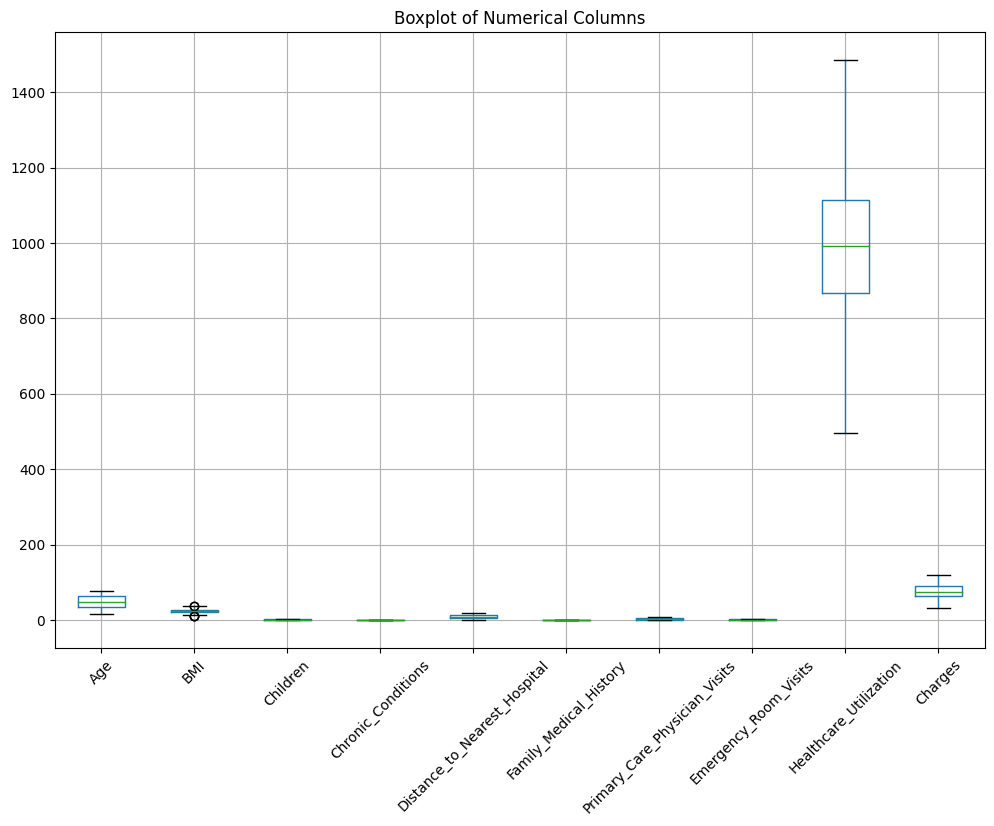

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Identify numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()

# Plot all boxplots together
plt.figure(figsize=(12, 8))
data[numerical_columns].boxplot()
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()


In [17]:
import numpy as np
def detect_outliers_z_score(data):
    threshold = 3
    outliers = []
    mean = np.mean(data)
    std_dev = np.std(data)
    for i in data:
        z_score = (i - mean) / std_dev
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

# Detect outliers in all specified columns
columns_to_check = ['Age', 'BMI', 'Children', 'Chronic_Conditions', 'Distance_to_Nearest_Hospital', 'Family_Medical_History',
                   'Primary_Care_Physician_Visits', 'Emergency_Room_Visits',
                   'Healthcare_Utilization', 'Charges']

outliers_dict = {}
for column in columns_to_check:
    outliers = detect_outliers_z_score(data[column])
    outliers_dict[column] = outliers

print("Outliers in each column:")
for column, outliers in outliers_dict.items():
    print(column, ":", outliers)



Outliers in each column:
Age : []
BMI : []
Children : []
Chronic_Conditions : []
Distance_to_Nearest_Hospital : []
Family_Medical_History : []
Primary_Care_Physician_Visits : []
Emergency_Room_Visits : []
Healthcare_Utilization : []
Charges : []


All the outlier values are replaced.

In [18]:
dis= data[columns_to_check]
dis

,Age,BMI,Children,Chronic_Conditions,Distance_to_Nearest_Hospital,Family_Medical_History,Primary_Care_Physician_Visits,Emergency_Room_Visits,Healthcare_Utilization,Charges
0,56.0,26.787630,0.0,2.0,12.233110,0.0,6.000000,4.0,975.538000,84.787630
1,69.0,22.063650,4.0,2.0,11.314950,0.0,2.000000,2.0,1047.977000,92.063650
2,46.0,24.036100,2.0,1.0,14.294050,1.0,9.000000,2.0,836.385400,71.036100
3,32.0,24.229820,2.0,2.0,18.754090,0.0,2.000000,0.0,927.065300,58.229820
4,60.0,31.784280,0.0,0.0,18.245090,1.0,2.000000,2.0,1260.797000,91.784280
...,...,...,...,...,...,...,...,...,...,...
995,18.0,17.794340,0.0,1.0,3.480209,0.0,2.000000,2.0,932.216700,36.794340
996,35.0,22.538240,1.0,1.0,15.215190,1.0,2.000000,4.0,1280.235000,58.538240
997,49.0,18.285480,4.0,2.0,0.316761,0.0,3.000000,1.0,1336.665000,69.285480
998,64.0,22.096110,2.0,0.0,11.156200,1.0,8.000000,0.0,779.283400,88.096110


In [19]:
cat = data.select_dtypes(include=['object']).columns

print("Categorical columns:", cat) #Categorical columns in the dataet.

Categorical columns: Index(['Sex', 'Smoker', 'Region', 'Occupation', 'Exercise_Frequency',
       'Insurance_Plan_Type', 'Marital_Status', 'Income_Level',
       'Mental_Health_Status', 'Prescription_Medication_Usage',
       'Employment_Status', 'Education_Level', 'Dietary_Habits',
       'Alcohol_Consumption', 'Sleep_Quality', 'Stress_Level',
       'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare',
       'Social_Support', 'Environmental_Factors', 'Genetic_Predisposition',
       'Health_Literacy_Level', 'Comorbidities', 'Access_to_Telemedicine'],
      dtype='object')


In [20]:
missing_values = data[cat].isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
Sex                               50
Smoker                            48
Region                            48
Occupation                        49
Exercise_Frequency                49
Insurance_Plan_Type               49
Marital_Status                    47
Income_Level                      50
Mental_Health_Status              48
Prescription_Medication_Usage     49
Employment_Status                 48
Education_Level                   50
Dietary_Habits                    48
Alcohol_Consumption              348
Sleep_Quality                     49
Stress_Level                      48
Medication_Adherence              50
Physical_Activity                 47
Access_to_Healthcare              49
Social_Support                    50
Environmental_Factors             49
Genetic_Predisposition            47
Health_Literacy_Level             50
Comorbidities                     48
Access_to_Telemedicine            50
dtype: int64


This shows the number of missing values in the categorical column.

In [21]:
cat=data[cat]
cat

,Sex,Smoker,Region,Occupation,Exercise_Frequency,Insurance_Plan_Type,Marital_Status,Income_Level,Mental_Health_Status,Prescription_Medication_Usage,Employment_Status,Education_Level,Dietary_Habits,Alcohol_Consumption,Sleep_Quality,Stress_Level,Medication_Adherence,Physical_Activity,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine
0,Male,No,East,White Collar,Daily,Gold,Married,Medium,Good,Yes,Self-Employed,Graduate,Unhealthy,Moderate,Good,High,No,Active,Difficult,Weak,Good,Present,High,Yes,Unavailable
1,Male,Yes,West,White Collar,Monthly,Bronze,Single,High,Fair,No,Self-Employed,Graduate,Healthy,Moderate,Good,Medium,No,NaN,Difficult,Weak,Good,Absent,High,Yes,Available
2,Female,Yes,East,White Collar,Rarely,Silver,Single,Medium,NaN,No,Self-Employed,College,Healthy,Moderate,Good,High,Yes,Inactive,Difficult,Strong,Good,Absent,Low,No,Unavailable
3,Male,No,North,Blue Collar,Rarely,Gold,Married,High,Good,No,Self-Employed,Graduate,Unhealthy,Moderate,Good,High,Yes,Inactive,NaN,Strong,Good,NaN,Low,No,Available
4,Male,NaN,East,Blue Collar,Weekly,Silver,Single,Low,Fair,Yes,Self-Employed,College,Unhealthy,Heavy,Poor,Medium,Yes,NaN,Easy,Weak,Poor,Present,Low,Yes,Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Male,Yes,West,Other,Monthly,Silver,Divorced,High,Poor,Yes,Self-Employed,Graduate,Unhealthy,Heavy,Poor,Low,Yes,Inactive,Difficult,Strong,Good,Absent,Low,Yes,Unavailable
996,Female,Yes,NaN,Other,Monthly,NaN,Single,Low,Good,No,Unemployed,Graduate,Healthy,Moderate,Good,Low,No,Active,Easy,Weak,Good,Absent,Low,Yes,Unavailable
997,NaN,No,South,Other,Monthly,Bronze,Married,Medium,NaN,No,NaN,Graduate,Healthy,NaN,Good,High,No,Inactive,Easy,NaN,Poor,NaN,High,No,Unavailable
998,Male,No,West,White Collar,Rarely,Gold,Married,Low,Poor,No,Unemployed,Graduate,Unhealthy,Moderate,NaN,High,Yes,Active,Difficult,Strong,Good,Present,High,Yes,Unavailable


In [22]:
def spot_missing_values(df):
    missing_values = {'NaN': 0, 'None': 0, 'nan': 0}

    for column in df.columns:
        for value in df[column]:
            if str(value).lower() == 'NaN':
                missing_values['Vacant Space'] += 1
            elif str(value).lower() == 'none':
                missing_values['None'] += 1
            elif str(value).lower() == 'nan':
                missing_values['nan'] += 1

    return missing_values

# Spot missing values in the DataFrame
missing_values_counts = spot_missing_values(cat)

# Report if any missing values are found
if any(count > 0 for count in missing_values_counts.values()):
    print("Missing values spotted:")
    for value_type, count in missing_values_counts.items():
        if count > 0:
            print(f"{value_type}: {count}")
else:
    print("No missing values spotted.")

Missing values spotted:
nan: 1518


Filling the null value column in the categorical column with mode value.


In [23]:
# Replace 'nan' strings with actual NaN values
cat.replace('nan', pd.NA, inplace=True)

# Replace NaN values with the mode of each column
for column in cat.columns:
    mode_value = cat[column].mode()[0]  # Calculate the mode of the column
    cat[column].fillna(mode_value, inplace=True)  # Fill NaN values with the mode




<ipython-input-23-851c361b8dd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat.replace('nan', pd.NA, inplace=True)
<ipython-input-23-851c361b8dd9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat[column].fillna(mode_value, inplace=True)  # Fill NaN values with the mode


In [24]:
cat = cat.fillna(method='ffill')

# Replacing occurrences of "None" with forward fill
for column in cat.columns:
    cat[column] = cat[column].replace('None', method='ffill')

In [25]:
missing_values_counts = spot_missing_values(cat)

# Report if any missing values are found
if any(count > 0 for count in missing_values_counts.values()):
    print("Missing values spotted:")
    for value_type, count in missing_values_counts.items():
        if count > 0:
            print(f"{value_type}: {count}")
else:
    print("No missing values spotted.")

No missing values spotted.


In [26]:
cat.isnull().sum()

Sex                              0
Smoker                           0
Region                           0
Occupation                       0
Exercise_Frequency               0
Insurance_Plan_Type              0
Marital_Status                   0
Income_Level                     0
Mental_Health_Status             0
Prescription_Medication_Usage    0
Employment_Status                0
Education_Level                  0
Dietary_Habits                   0
Alcohol_Consumption              0
Sleep_Quality                    0
Stress_Level                     0
Medication_Adherence             0
Physical_Activity                0
Access_to_Healthcare             0
Social_Support                   0
Environmental_Factors            0
Genetic_Predisposition           0
Health_Literacy_Level            0
Comorbidities                    0
Access_to_Telemedicine           0
dtype: int64

In [27]:
dis.isnull().sum()

Age                              0
BMI                              0
Children                         0
Chronic_Conditions               0
Distance_to_Nearest_Hospital     0
Family_Medical_History           0
Primary_Care_Physician_Visits    0
Emergency_Room_Visits            0
Healthcare_Utilization           0
Charges                          0
dtype: int64

All the null values in the numerical column and categorical column were handled.

In [28]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the categorical columns
categorical_columns = ['Sex', 'Smoker', 'Region', 'Occupation', 'Exercise_Frequency',
                       'Insurance_Plan_Type', 'Marital_Status', 'Income_Level',
                       'Mental_Health_Status', 'Prescription_Medication_Usage',
                       'Employment_Status', 'Education_Level', 'Dietary_Habits',
                       'Alcohol_Consumption', 'Sleep_Quality', 'Stress_Level',
                       'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare',
                       'Social_Support', 'Environmental_Factors', 'Genetic_Predisposition',
                       'Health_Literacy_Level', 'Comorbidities', 'Access_to_Telemedicine']


# Print unique values for each selected column
for column in categorical_columns:
    unique_values = cat[column].unique()
    print("Unique values of the '{}' column:".format(column))
    print(unique_values)
    print(cat[column].value_counts())
    print(cat[column].isnull().sum())
    print()

Unique values of the 'Sex' column:
['Male' 'Female']
Sex
Male      546
Female    454
Name: count, dtype: int64
0

Unique values of the 'Smoker' column:
['No' 'Yes']
Smoker
No     524
Yes    476
Name: count, dtype: int64
0

Unique values of the 'Region' column:
['East' 'West' 'North' 'South']
Region
East     296
West     247
South    234
North    223
Name: count, dtype: int64
0

Unique values of the 'Occupation' column:
['White Collar' 'Blue Collar' 'Other']
Occupation
Other           377
Blue Collar     313
White Collar    310
Name: count, dtype: int64
0

Unique values of the 'Exercise_Frequency' column:
['Daily' 'Monthly' 'Rarely' 'Weekly']
Exercise_Frequency
Weekly     320
Daily      236
Rarely     233
Monthly    211
Name: count, dtype: int64
0

Unique values of the 'Insurance_Plan_Type' column:
['Gold' 'Bronze' 'Silver']
Insurance_Plan_Type
Bronze    377
Silver    320
Gold      303
Name: count, dtype: int64
0

Unique values of the 'Marital_Status' column:
['Married' 'Single' 'Divorc

**ENCODING CATEGORICAL VALUES**

TWO Types of encoding were performed:

One-Hot Encoding:

One-Hot Encoding is a technique used to convert categorical variables into a format that can be provided to machine learning algorithms to improve predictions. It transforms each category value into a new binary column (or feature), representing the presence (1) or absence (0) of the category.

Label Encoding:

Label Encoding is a technique used to convert categorical variables into numerical values. Each category is assigned a unique integer value. Unlike one-hot encoding, label encoding keeps the data in a single column but replaces the categorical values with numbers.



In [29]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the columns mentioned
columns_to_label_encode = ['Exercise_Frequency', 'Income_Level', 'Education_Level']
columns_to_one_hot_encode = ['Sex', 'Smoker', 'Region', 'Occupation', 'Insurance_Plan_Type',
                             'Marital_Status', 'Mental_Health_Status', 'Prescription_Medication_Usage',
                             'Employment_Status', 'Dietary_Habits', 'Alcohol_Consumption', 'Sleep_Quality',
                             'Stress_Level', 'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare',
                             'Social_Support', 'Environmental_Factors', 'Genetic_Predisposition',
                             'Health_Literacy_Level', 'Comorbidities', 'Access_to_Telemedicine']



In [30]:
# Concatenate the DataFrames column-wise
df_cleaned = pd.concat([cat, dis], axis=1)
df_cleaned

,Sex,Smoker,Region,Occupation,Exercise_Frequency,Insurance_Plan_Type,Marital_Status,Income_Level,Mental_Health_Status,Prescription_Medication_Usage,Employment_Status,Education_Level,Dietary_Habits,Alcohol_Consumption,Sleep_Quality,Stress_Level,Medication_Adherence,Physical_Activity,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine,Age,BMI,Children,Chronic_Conditions,Distance_to_Nearest_Hospital,Family_Medical_History,Primary_Care_Physician_Visits,Emergency_Room_Visits,Healthcare_Utilization,Charges
0,Male,No,East,White Collar,Daily,Gold,Married,Medium,Good,Yes,Self-Employed,Graduate,Unhealthy,Moderate,Good,High,No,Active,Difficult,Weak,Good,Present,High,Yes,Unavailable,56.0,26.787630,0.0,2.0,12.233110,0.0,6.000000,4.0,975.538000,84.787630
1,Male,Yes,West,White Collar,Monthly,Bronze,Single,High,Fair,No,Self-Employed,Graduate,Healthy,Moderate,Good,Medium,No,Inactive,Difficult,Weak,Good,Absent,High,Yes,Available,69.0,22.063650,4.0,2.0,11.314950,0.0,2.000000,2.0,1047.977000,92.063650
2,Female,Yes,East,White Collar,Rarely,Silver,Single,Medium,Fair,No,Self-Employed,College,Healthy,Moderate,Good,High,Yes,Inactive,Difficult,Strong,Good,Absent,Low,No,Unavailable,46.0,24.036100,2.0,1.0,14.294050,1.0,9.000000,2.0,836.385400,71.036100
3,Male,No,North,Blue Collar,Rarely,Gold,Married,High,Good,No,Self-Employed,Graduate,Unhealthy,Moderate,Good,High,Yes,Inactive,Difficult,Strong,Good,Present,Low,No,Available,32.0,24.229820,2.0,2.0,18.754090,0.0,2.000000,0.0,927.065300,58.229820
4,Male,No,East,Blue Collar,Weekly,Silver,Single,Low,Fair,Yes,Self-Employed,College,Unhealthy,Heavy,Poor,Medium,Yes,Inactive,Easy,Weak,Poor,Present,Low,Yes,Available,60.0,31.784280,0.0,0.0,18.245090,1.0,2.000000,2.0,1260.797000,91.784280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Male,Yes,West,Other,Monthly,Silver,Divorced,High,Poor,Yes,Self-Employed,Graduate,Unhealthy,Heavy,Poor,Low,Yes,Inactive,Difficult,Strong,Good,Absent,Low,Yes,Unavailable,18.0,17.794340,0.0,1.0,3.480209,0.0,2.000000,2.0,932.216700,36.794340
996,Female,Yes,East,Other,Monthly,Bronze,Single,Low,Good,No,Unemployed,Graduate,Healthy,Moderate,Good,Low,No,Active,Easy,Weak,Good,Absent,Low,Yes,Unavailable,35.0,22.538240,1.0,1.0,15.215190,1.0,2.000000,4.0,1280.235000,58.538240
997,Male,No,South,Other,Monthly,Bronze,Married,Medium,Fair,No,Employed,Graduate,Healthy,Heavy,Good,High,No,Inactive,Easy,Weak,Poor,Present,High,No,Unavailable,49.0,18.285480,4.0,2.0,0.316761,0.0,3.000000,1.0,1336.665000,69.285480
998,Male,No,West,White Collar,Rarely,Gold,Married,Low,Poor,No,Unemployed,Graduate,Unhealthy,Moderate,Good,High,Yes,Active,Difficult,Strong,Good,Present,High,Yes,Unavailable,64.0,22.096110,2.0,0.0,11.156200,1.0,8.000000,0.0,779.283400,88.096110


**EDA**

**DISTRIBUTION PLOT**

Histogram

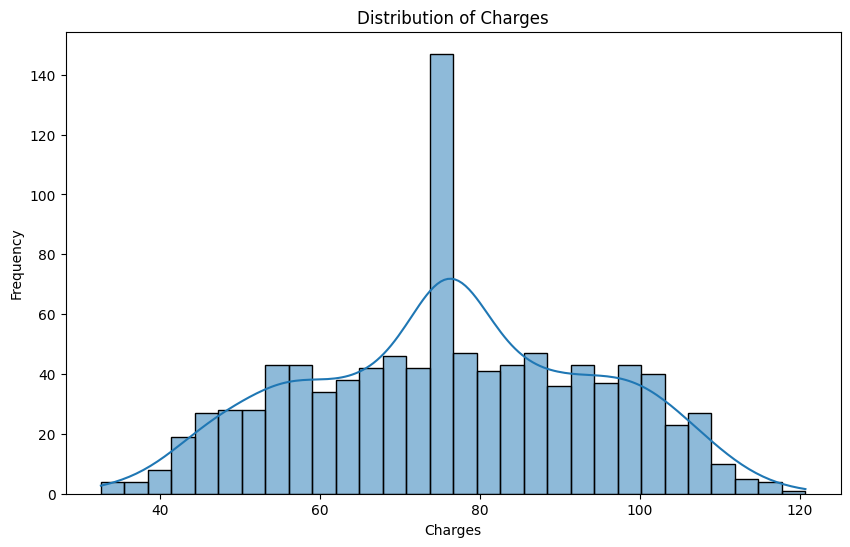

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Charges
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Charges'], kde=True, bins=30)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


X-axis (Charges): Represents the range of medical insurance charges. The axis shows the different charge amounts.

Y-axis (Frequency): Represents the number of occurrences (frequency) of each charge amount within the dataset.

The histogram is divided into bins (30 bins in this case), and each bin represents a range of charges. The height of each bin indicates how many data points (individuals) fall within that charge range.

The plot implies that the charges 74 - 77 have highest frequency.


Box plot of Charges by Region

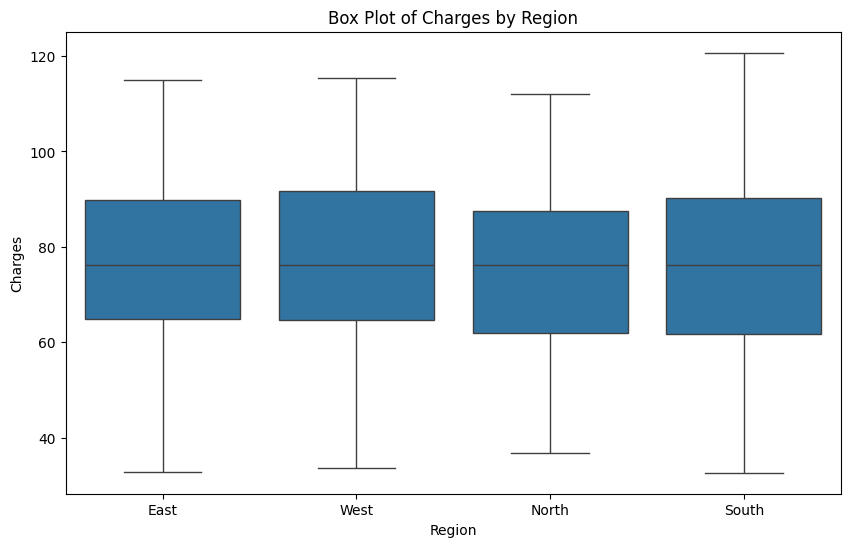

In [32]:
# Box plot of Charges by Region
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Charges', data=data)
plt.title('Box Plot of Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()


X-axis (Region): Represents different regions. Each box plot corresponds to a different region.

Y-axis (Charges): Represents the distribution of insurance charges for each region.

The box plot of Charges by Region provides a visual summary of the distribution of medical insurance charges across different regions.

The plot implies the charges lies between 70 - 90 the most.

**RELATIONSHIP PLOT**

Scatter plot of BMI vs Charges

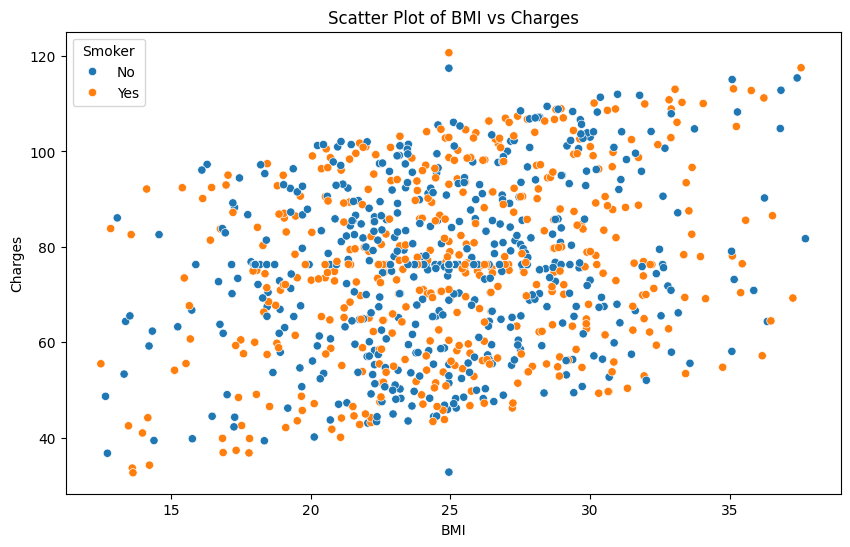

In [33]:
# Scatter plot of BMI vs Charges
plt.figure(figsize=(10, 6))

# Create a scatter plot with 'BMI' on the x-axis and 'Charges' on the y-axis, coloring points by 'Smoker' status
sns.scatterplot(x='BMI', y='Charges', data=data, hue='Smoker')
plt.title('Scatter Plot of BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()


X-axis (BMI): Represents the Body Mass Index of individuals. BMI is a measure calculated using a person's weight and height, and it’s often used to categorize individuals into different weight categories (underweight, normal weight, overweight, and obese).

Y-axis (Charges): Represents the medical insurance charges or costs for individuals. These charges could depend on various factors including health conditions, lifestyle, and demographics.

Hue (Smoker): This parameter adds a third dimension to the plot by using different colors to distinguish between smokers and non-smokers. This helps in understanding if smoking status has any noticeable impact on the relationship between BMI and medical charges

 Pair plot of selected features: AGE, BMI, CHARGES, CHILDREN

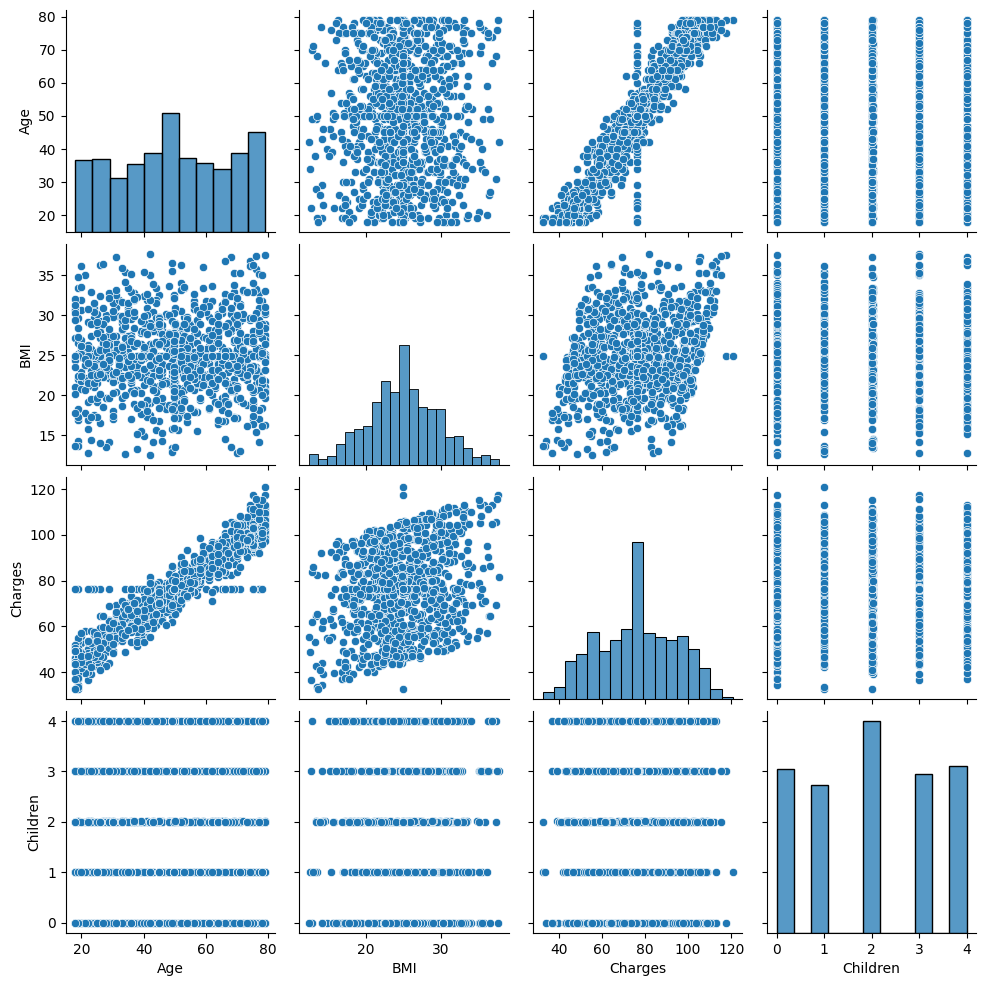

In [34]:
# Pair plot of selected features
sns.pairplot(data[['Age', 'BMI', 'Charges', 'Children']])
plt.show()


The pairplot function from seaborn creates a matrix of scatter plots for each pair of the selected features (Age, BMI, Charges, Children) along with the distribution of each feature on the diagonal.

**CATEGORICAL PLOT**

Bar plot of average Charges by Smoker status

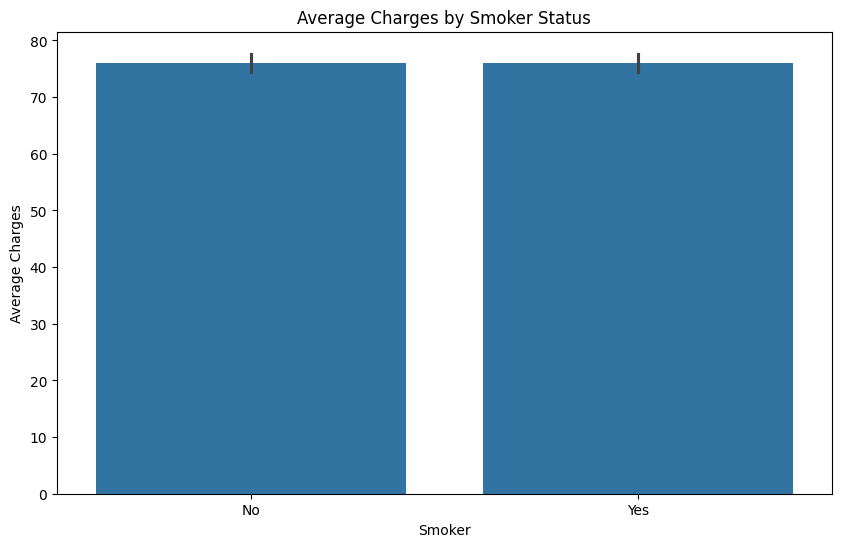

In [35]:
# Bar plot of average Charges by Smoker status
plt.figure(figsize=(10, 6))
sns.barplot(x='Smoker', y='Charges', data=data)
plt.title('Average Charges by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Average Charges')
plt.show()



The bar plot of average charges by smoker status provides a visual summary of the average medical insurance charges for smokers and non-smokers.
The plot didnt show any trend in the charges of smoling and non smoking people.

Count plot of Insurance Plan Type

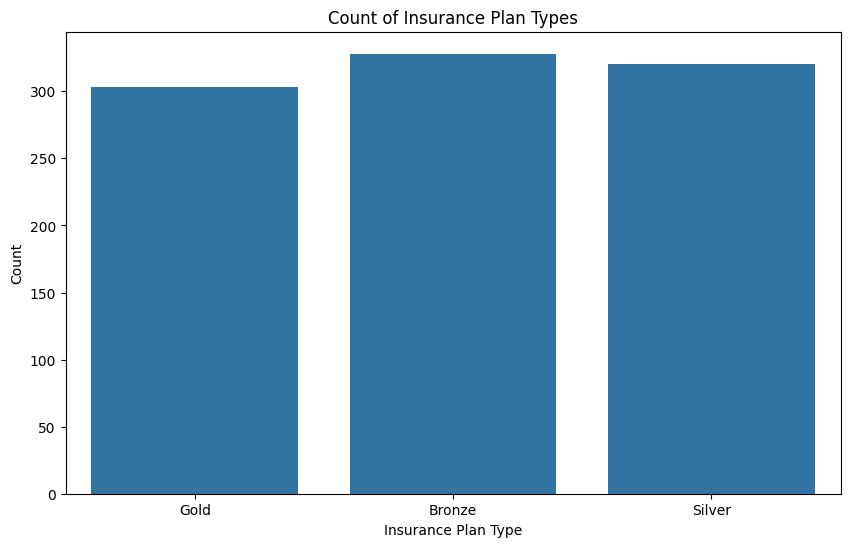

In [36]:
# Count plot of Insurance Plan Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Insurance_Plan_Type', data=data)
plt.title('Count of Insurance Plan Types')
plt.xlabel('Insurance Plan Type')
plt.ylabel('Count')
plt.show()


A count plot displays the frequency of occurrence for each category of insurance type.

Bars: Each bar represents the number of occurrences (count) of each insurance plan type.

X-axis (Insurance Plan Type): Represents the different categories of insurance plans available in your dataset.

Y-axis (Count): Represents the number of records (individuals) that fall into each insurance plan category.

In [ ]:
df_cleaned.isnull().sum()

Sex                              0
Smoker                           0
Region                           0
Occupation                       0
Exercise_Frequency               0
Insurance_Plan_Type              0
Marital_Status                   0
Income_Level                     0
Mental_Health_Status             0
Prescription_Medication_Usage    0
Employment_Status                0
Education_Level                  0
Dietary_Habits                   0
Alcohol_Consumption              0
Sleep_Quality                    0
Stress_Level                     0
Medication_Adherence             0
Physical_Activity                0
Access_to_Healthcare             0
Social_Support                   0
Environmental_Factors            0
Genetic_Predisposition           0
Health_Literacy_Level            0
Comorbidities                    0
Access_to_Telemedicine           0
Age                              0
BMI                              0
Children                         0
Chronic_Conditions  

In [38]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each column
for col in columns_to_label_encode:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])


# Apply one-hot encoding
df_cleaned = pd.get_dummies(df_cleaned, columns=columns_to_one_hot_encode)

# Print the first few rows of the updated DataFrame
df_cleaned.head()

,Exercise_Frequency,Income_Level,Education_Level,Age,BMI,Children,Chronic_Conditions,Distance_to_Nearest_Hospital,Family_Medical_History,Primary_Care_Physician_Visits,Emergency_Room_Visits,Healthcare_Utilization,Charges,Sex_Female,Sex_Male,Smoker_No,Smoker_Yes,Region_East,Region_North,Region_South,Region_West,Occupation_Blue Collar,Occupation_Other,Occupation_White Collar,Insurance_Plan_Type_Bronze,Insurance_Plan_Type_Gold,Insurance_Plan_Type_Silver,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Mental_Health_Status_Fair,Mental_Health_Status_Good,Mental_Health_Status_Poor,Prescription_Medication_Usage_No,Prescription_Medication_Usage_Yes,Employment_Status_Employed,Employment_Status_Self-Employed,Employment_Status_Unemployed,Dietary_Habits_Healthy,Dietary_Habits_Unhealthy,Alcohol_Consumption_Heavy,Alcohol_Consumption_Moderate,Sleep_Quality_Good,Sleep_Quality_Poor,Stress_Level_High,Stress_Level_Low,Stress_Level_Medium,Medication_Adherence_No,Medication_Adherence_Yes,Physical_Activity_Active,Physical_Activity_Inactive,Access_to_Healthcare_Difficult,Access_to_Healthcare_Easy,Social_Support_Strong,Social_Support_Weak,Environmental_Factors_Good,Environmental_Factors_Poor,Genetic_Predisposition_Absent,Genetic_Predisposition_Present,Health_Literacy_Level_High,Health_Literacy_Level_Low,Comorbidities_No,Comorbidities_Yes,Access_to_Telemedicine_Available,Access_to_Telemedicine_Unavailable
0,0,2,1,56.0,26.78763,0.0,2.0,12.23311,0.0,6.0,4.0,975.5380,84.78763,False,True,True,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,True,True,False,True,False,False,True,False,True,False,True,False,False,True,True,False,False,True,True,False,False,True,False,True
1,1,0,1,69.0,22.06365,4.0,2.0,11.31495,0.0,2.0,2.0,1047.9770,92.06365,False,True,False,True,False,False,False,True,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,True,False,False,True,True,False,False,False,True,True,False,False,True,True,False,False,True,True,False,True,False,True,False,False,True,True,False
2,2,2,0,46.0,24.03610,2.0,1.0,14.29405,1.0,9.0,2.0,836.3854,71.03610,True,False,False,True,True,False,False,False,False,False,True,False,False,True,False,False,True,True,False,False,True,False,False,True,False,True,False,False,True,True,False,True,False,False,False,True,False,True,True,False,True,False,True,False,True,False,False,True,True,False,False,True
3,2,0,1,32.0,24.22982,2.0,2.0,18.75409,0.0,2.0,0.0,927.0653,58.22982,False,True,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False,True,False,True,True,False,True,False,False,False,True,False,True,True,False,True,False,True,False,False,True,False,True,True,False,True,False
4,3,1,0,60.0,31.78428,0.0,0.0,18.24509,1.0,2.0,2.0,1260.7970,91.78428,False,True,True,False,True,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,True,False,False,True,True,False,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,True,False


**HEATMAP**

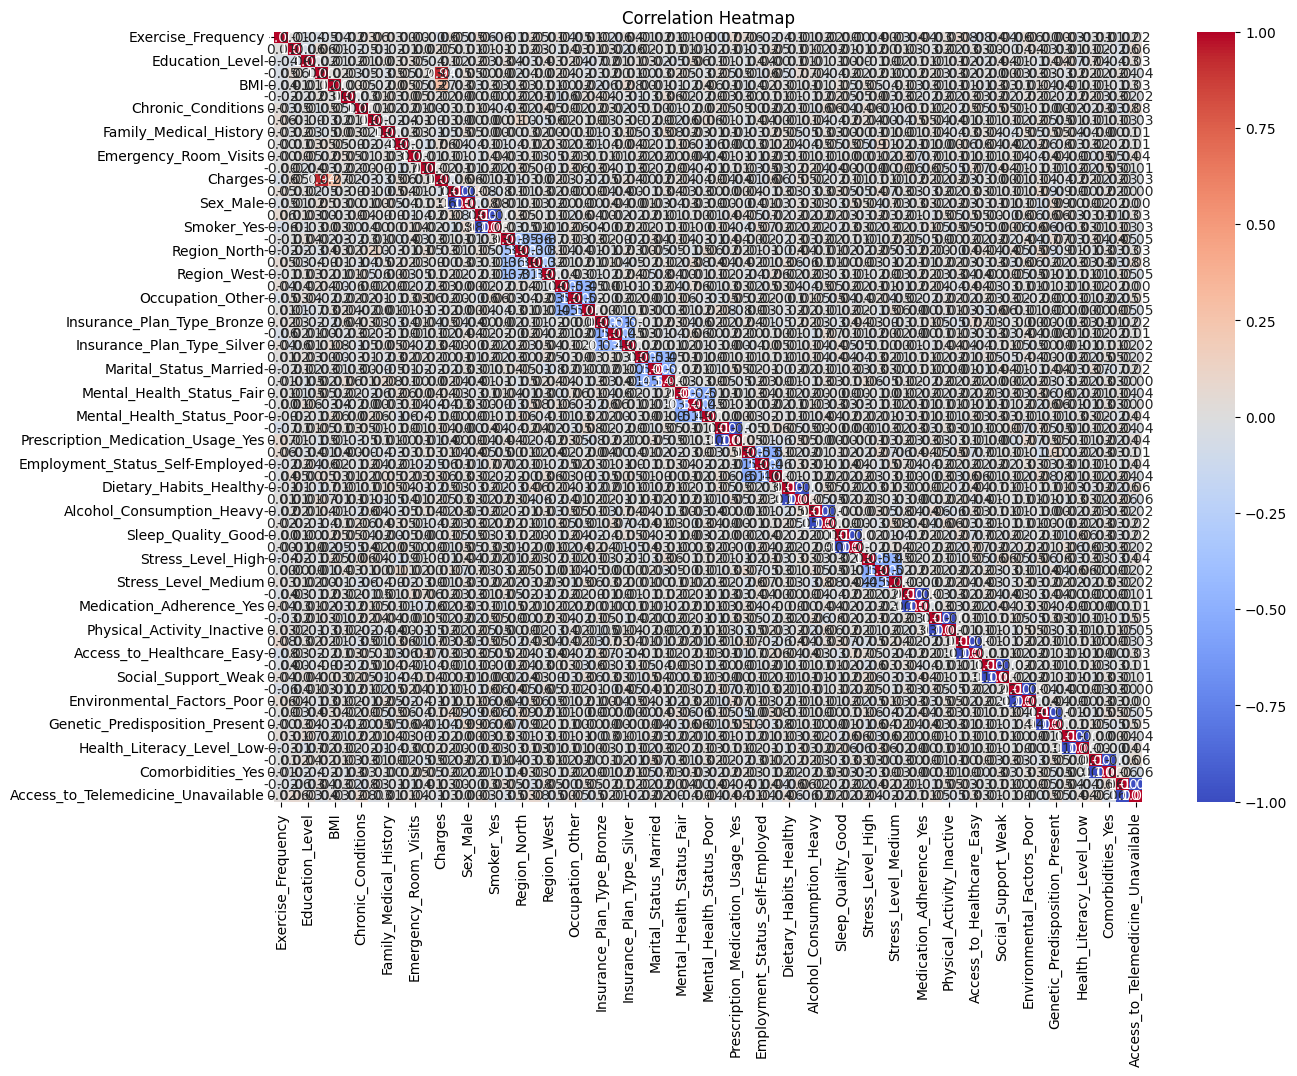

In [39]:
# Heatmap of correlations between numerical features
plt.figure(figsize=(14, 10))
corr_matrix = df_cleaned.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


The heatmap of correlations between numerical features provides a visual representation of the correlation matrix, which shows the pairwise correlations between all numerical variables in your dataset.

Violin Plot


<ipython-input-41-a395d1543ce7>:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='Education_Level', y='Charges', data=data, scale='width')


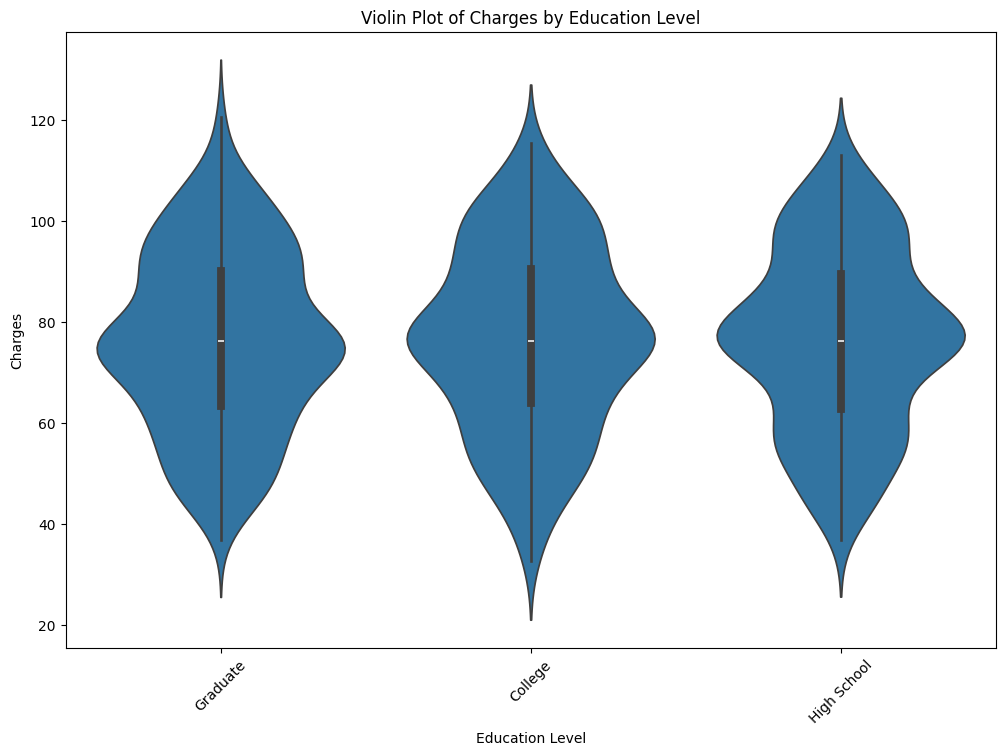

In [41]:
# Violin plot of Charges by Education Level
plt.figure(figsize=(12, 8))
sns.violinplot(x='Education_Level', y='Charges', data=data, scale='width')
plt.title('Violin Plot of Charges by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Charges')
plt.xticks(rotation=45)
plt.show()


The violin plot of Charges by Education Level provides a visual representation of the distribution of medical insurance charges across different education levels.

Violin Shapes: Each shape represents the distribution of Charges for a specific Education_Level. The width of the shape at different Charges values indicates the density of data points at those values.

Central Line: The white dot in the center of the violin represents the median Charges, the thick bar in the center represents the interquartile range (IQR), and the thin line represents the rest of the distribution except for outliers.

Width Scaling: The scale='width' parameter ensures that all violins have the same width, making it easier to compare distributions across categories.

Swarm plot of Charges by Smoker status.

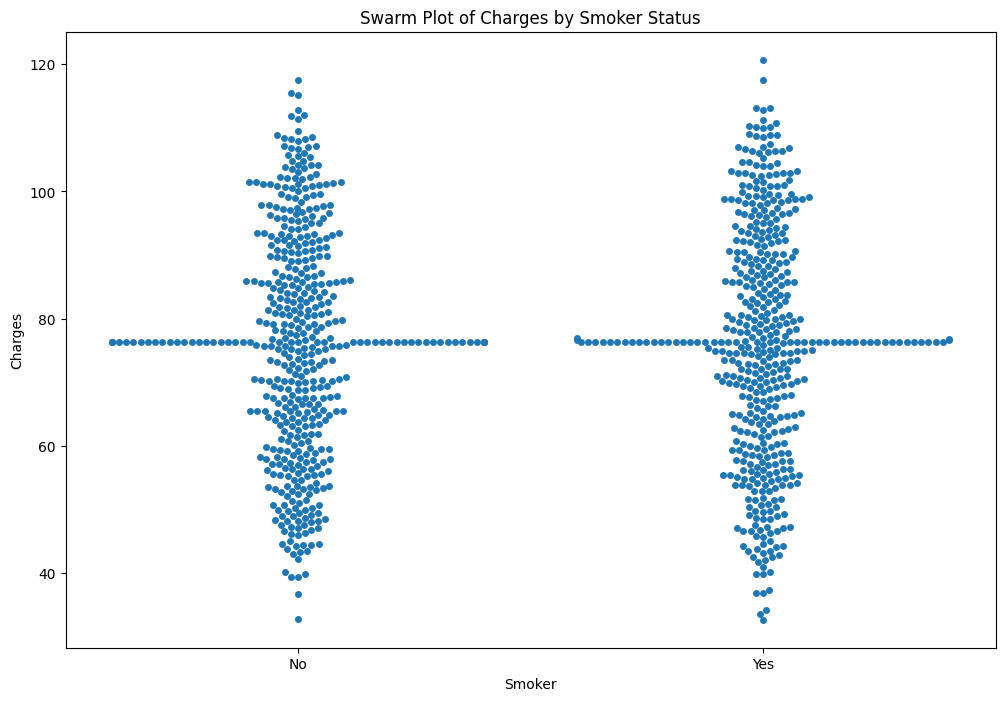

In [42]:
# Swarm plot of Charges by Smoker status
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Smoker', y='Charges', data=data)
plt.title('Swarm Plot of Charges by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()



A swarm plot is a type of scatter plot where data points are plotted along the categorical axis with a slight adjustment to avoid overlap, making it possible to see each individual data point.

Data Points: Each point represents an individual record in the dataset, showing the value of Charges for each Smoker status category.

X-axis (Smoker): Represents the smoker status, typically with two categories: 'Yes' (smoker) and 'No' (non-smoker).

Y-axis (Charges): Represents the medical insurance charges for each individual.

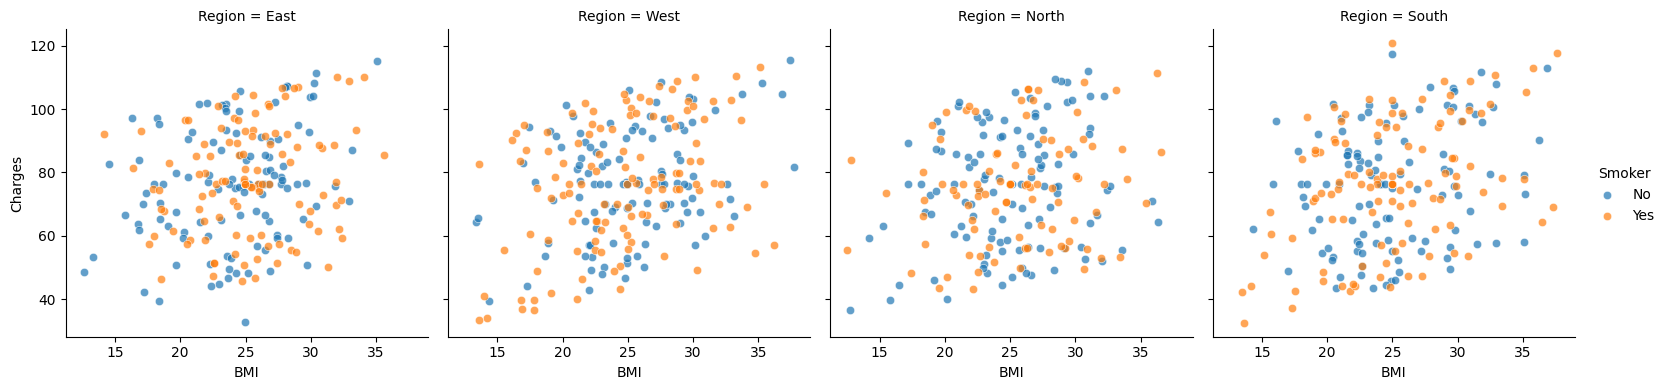

In [43]:
# Facet Grid of Charges by Region and Smoker status
g = sns.FacetGrid(data, col="Region", hue="Smoker", height=4, aspect=1)
g.map(sns.scatterplot, "BMI", "Charges", alpha=.7)
g.add_legend() #Adds a legend to the plot to indicate which colors correspond to smokers and non-smokers.
plt.show()



The FacetGrid of Charges by Region and Smoker status provides a way to visualize how medical insurance charges vary with BMI, categorized by region and smoker status.



**SPLITTING DATA X, Y**

In [ ]:
# Splitting Data
x = df_cleaned.drop(columns=['Charges'])
y = df_cleaned['Charges']


In [ ]:
x.columns

Index(['Exercise_Frequency', 'Income_Level', 'Education_Level', 'Age', 'BMI',
       'Children', 'Chronic_Conditions', 'Distance_to_Nearest_Hospital',
       'Family_Medical_History', 'Primary_Care_Physician_Visits',
       'Emergency_Room_Visits', 'Healthcare_Utilization', 'Sex_Female',
       'Sex_Male', 'Smoker_No', 'Smoker_Yes', 'Region_East', 'Region_North',
       'Region_South', 'Region_West', 'Occupation_Blue Collar',
       'Occupation_Other', 'Occupation_White Collar',
       'Insurance_Plan_Type_Bronze', 'Insurance_Plan_Type_Gold',
       'Insurance_Plan_Type_Silver', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Mental_Health_Status_Fair', 'Mental_Health_Status_Good',
       'Mental_Health_Status_Poor', 'Prescription_Medication_Usage_No',
       'Prescription_Medication_Usage_Yes', 'Employment_Status_Employed',
       'Employment_Status_Self-Employed', 'Employment_Status_Unemployed',
       'Dietary_Habits_Healthy', 'Dietary_Ha

In [ ]:
df_cleaned.corr()

,Exercise_Frequency,Income_Level,Education_Level,Age,BMI,Children,Chronic_Conditions,Distance_to_Nearest_Hospital,Family_Medical_History,Primary_Care_Physician_Visits,Emergency_Room_Visits,Healthcare_Utilization,Charges,Sex_Female,Sex_Male,Smoker_No,Smoker_Yes,Region_East,Region_North,Region_South,Region_West,Occupation_Blue Collar,Occupation_Other,Occupation_White Collar,Insurance_Plan_Type_Bronze,Insurance_Plan_Type_Gold,Insurance_Plan_Type_Silver,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Mental_Health_Status_Fair,Mental_Health_Status_Good,Mental_Health_Status_Poor,Prescription_Medication_Usage_No,Prescription_Medication_Usage_Yes,Employment_Status_Employed,Employment_Status_Self-Employed,Employment_Status_Unemployed,Dietary_Habits_Healthy,Dietary_Habits_Unhealthy,Alcohol_Consumption_Heavy,Alcohol_Consumption_Moderate,Sleep_Quality_Good,Sleep_Quality_Poor,Stress_Level_High,Stress_Level_Low,Stress_Level_Medium,Medication_Adherence_No,Medication_Adherence_Yes,Physical_Activity_Active,Physical_Activity_Inactive,Access_to_Healthcare_Difficult,Access_to_Healthcare_Easy,Social_Support_Strong,Social_Support_Weak,Environmental_Factors_Good,Environmental_Factors_Poor,Genetic_Predisposition_Absent,Genetic_Predisposition_Present,Health_Literacy_Level_High,Health_Literacy_Level_Low,Comorbidities_No,Comorbidities_Yes,Access_to_Telemedicine_Available,Access_to_Telemedicine_Unavailable
Exercise_Frequency,1.000000,0.014269,-0.043869,-0.052188,-0.036409,-0.017602,0.026020,0.059076,0.033162,0.003213,0.001337,-0.002481,-0.055128,0.046448,-0.046448,0.064289,-0.064289,-0.012384,-0.022907,0.050832,-0.014683,0.040226,-0.051896,0.014048,0.024660,-0.063857,0.037289,0.011513,-0.016759,0.006144,0.005226,-0.001888,-0.003623,-0.073044,0.073044,0.059590,-0.024442,-0.037745,-0.011518,0.011518,-0.018869,0.018869,-0.002172,0.002172,-0.035100,0.004432,0.030755,-0.044698,0.044698,-0.034320,0.034320,0.080706,-0.080706,-0.036219,0.036219,-0.061380,0.061380,-0.004604,0.004604,0.032125,-0.032125,-0.005072,0.005072,-0.022134,0.022134
Income_Level,0.014269,1.000000,-0.063252,0.058730,0.005066,-0.023444,-0.047242,-0.011889,-0.015929,-0.013843,-0.001019,0.021498,0.053994,-0.007699,0.007699,0.005829,-0.005829,-0.006210,-0.017212,0.029165,-0.005445,-0.042922,0.029984,0.011616,0.032604,0.022107,-0.055653,0.018757,-0.011763,-0.006075,0.014496,0.007389,-0.023018,-0.008849,0.008849,-0.025452,-0.020364,0.047220,-0.013800,0.013800,0.019023,-0.019023,0.012455,-0.012455,-0.015119,0.003692,0.011375,0.028969,-0.028969,-0.021952,0.021952,-0.025385,0.025385,0.003258,-0.003258,-0.036308,0.036308,0.029451,-0.029451,0.006846,-0.006846,0.018541,-0.018541,-0.064539,0.064539
Education_Level,-0.043869,-0.063252,1.000000,-0.016570,0.005302,-0.022208,0.008817,-0.003035,0.031031,0.029042,0.051824,-0.035361,-0.008308,0.018668,-0.018668,0.033027,-0.033027,0.039383,-0.034751,-0.041720,0.032811,0.020509,0.042854,-0.065468,-0.022175,0.014311,0.008939,0.034260,0.020033,-0.054065,-0.047547,0.062498,-0.013582,0.010206,-0.010206,-0.036679,0.037704,0.000357,-0.013053,0.013053,0.009858,-0.009858,0.003805,-0.003805,-0.014030,-0.002022,0.016277,-0.012217,0.012217,0.009651,-0.009651,0.022582,-0.022582,-0.038539,0.038539,0.009789,-0.009789,-0.042190,0.042190,0.070272,-0.070272,0.039249,-0.039249,-0.031665,0.031665
Age,-0.052188,0.058730,-0.016570,1.000000,0.021939,0.026279,-0.051093,-0.025700,-0.053547,0.046938,-0.020328,0.025393,0.937173,-0.053345,0.053345,0.004239,-0.004239,0.019360,-0.039408,-0.000375,0.017912,0.044179,-0.018212,-0.025212,-0.016186,0.003310,0.013556,0.004009,-0.025699,0.022697,0.053892,-0.033905,-0.022537,0.054954,-0.054954,0.007681,-0.056378,0.048873,-0.065968,0.065968,0.035197,-0.035197,-0.019435,0.019435,-0.017830,0.014140,0.003138,-0.024016,0.024016,0.027454,-0.027454,0.018808,-0.018808,-0.000202,0.000202,0.027238,-0.027238,0.025694,-0.025694,-0.020989,0.020989,0.021240,-0.021240,0.036018,-0.036018
BMI,-0.036409,0.005066,0.005302,0.021939,1.000000,0.00304

In [ ]:
corr_matrix = df_cleaned.corr()
target_correlations = corr_matrix.iloc[:, -1]

In [ ]:
for feature, corr in target_correlations.items():
    print(f"{feature}: {corr:.2f}")

Exercise_Frequency: 0.02
Income_Level: 0.06
Education_Level: 0.03
Age: -0.04
BMI: 0.03
Children: -0.02
Chronic_Conditions: 0.08
Distance_to_Nearest_Hospital: -0.03
Family_Medical_History: 0.01
Primary_Care_Physician_Visits: 0.01
Emergency_Room_Visits: 0.04
Healthcare_Utilization: -0.01
Charges: -0.03
Sex_Female: -0.00
Sex_Male: 0.00
Smoker_No: 0.03
Smoker_Yes: -0.03
Region_East: -0.05
Region_North: 0.03
Region_South: 0.08
Region_West: -0.05
Occupation_Blue Collar: 0.00
Occupation_Other: 0.05
Occupation_White Collar: -0.05
Insurance_Plan_Type_Bronze: 0.02
Insurance_Plan_Type_Gold: 0.01
Insurance_Plan_Type_Silver: -0.02
Marital_Status_Divorced: -0.02
Marital_Status_Married: 0.02
Marital_Status_Single: -0.00
Mental_Health_Status_Fair: -0.04
Mental_Health_Status_Good: -0.00
Mental_Health_Status_Poor: 0.04
Prescription_Medication_Usage_No: -0.04
Prescription_Medication_Usage_Yes: 0.04
Employment_Status_Employed: 0.01
Employment_Status_Self-Employed: 0.04
Employment_Status_Unemployed: -0.04


In [ ]:
corr_df = pd.DataFrame({'Feature': target_correlations.index, 'Correlation': target_correlations.values})
print(corr_df)

                               Feature  Correlation
0                   Exercise_Frequency     0.022134
1                         Income_Level     0.064539
2                      Education_Level     0.031665
3                                  Age    -0.036018
4                                  BMI     0.025679
..                                 ...          ...
60           Health_Literacy_Level_Low     0.037147
61                    Comorbidities_No     0.059127
62                   Comorbidities_Yes    -0.059127
63    Access_to_Telemedicine_Available    -1.000000
64  Access_to_Telemedicine_Unavailable     1.000000

[65 rows x 2 columns]


Feature selection using selectKBest method

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Assuming X and y are already loaded

# Initialize the SelectKBest class for regression
selector = SelectKBest(score_func=f_regression, k=20)  # Select top 20 features

# Fit and transform the data
x_new = selector.fit_transform(x, y)

# Get the selected feature names
mask = selector.get_support()
selected_features = x.columns[mask]
print("Selected features:", selected_features)


Selected features: Index(['Exercise_Frequency', 'Income_Level', 'Age', 'BMI',
       'Family_Medical_History', 'Primary_Care_Physician_Visits', 'Sex_Female',
       'Sex_Male', 'Insurance_Plan_Type_Bronze', 'Insurance_Plan_Type_Silver',
       'Mental_Health_Status_Fair', 'Mental_Health_Status_Good',
       'Prescription_Medication_Usage_No', 'Prescription_Medication_Usage_Yes',
       'Employment_Status_Self-Employed', 'Employment_Status_Unemployed',
       'Dietary_Habits_Healthy', 'Dietary_Habits_Unhealthy',
       'Genetic_Predisposition_Absent', 'Genetic_Predisposition_Present'],
      dtype='object')


In [ ]:
# Create a new DataFrame with the selected features
x_selected = x[selected_features]
x_selected



,Exercise_Frequency,Income_Level,Age,BMI,Family_Medical_History,Primary_Care_Physician_Visits,Sex_Female,Sex_Male,Insurance_Plan_Type_Bronze,Insurance_Plan_Type_Silver,Mental_Health_Status_Fair,Mental_Health_Status_Good,Prescription_Medication_Usage_No,Prescription_Medication_Usage_Yes,Employment_Status_Self-Employed,Employment_Status_Unemployed,Dietary_Habits_Healthy,Dietary_Habits_Unhealthy,Genetic_Predisposition_Absent,Genetic_Predisposition_Present
0,0,2,56.0,26.787630,0.0,6.000000,False,True,False,False,False,True,False,True,True,False,False,True,False,True
1,1,0,69.0,22.063650,0.0,2.000000,False,True,True,False,True,False,True,False,True,False,True,False,True,False
2,2,2,46.0,24.036100,1.0,9.000000,True,False,False,True,True,False,True,False,True,False,True,False,True,False
3,2,0,32.0,24.229820,0.0,2.000000,False,True,False,False,False,True,True,False,True,False,False,True,False,True
4,3,1,60.0,31.784280,1.0,2.000000,False,True,False,True,True,False,False,True,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,18.0,17.794340,0.0,2.000000,False,True,False,True,False,False,False,True,True,False,False,True,True,False
996,1,1,35.0,22.538240,1.0,2.000000,True,False,True,False,False,True,True,False,False,True,True,False,True,False
997,1,2,49.0,18.285480,0.0,3.000000,False,True,True,False,True,False,True,False,False,False,True,False,False,True
998,2,1,64.0,22.096110,1.0,8.000000,False,True,False,False,False,False,True,False,False,True,False,True,False,True


**MODEL TRAINING**


**Linear Regression**

Linear regression is a statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (features). The goal is to find the best-fitting linear equation that predicts the dependent variable based on the independent variables.

The linear regression model can be represented by the equation:

y = βο + β1x1 + β2x2 + ... + βnxn + € where

y is the dependent variable.

β0 is the intercept.

β1 ,β2, …, βn are the coefficients for the independent variables 𝑥1, 𝑥2,...

ϵ is the error term, representing the difference between the observed and predicted values.


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x_selected, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(x_train, y_train)


LinearRegression()

In [ ]:
# Predict on the test data
y_pred = model.predict(x_test)

# Evaluate the model
# Calculating R-squared
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'R-squared: {r2}')
print(f'RMSE: {rmse}')
print("MSE: ", mse)


R-squared: 0.9657679953499575
RMSE: 3.3307268761850306
MSE:  11.093741523741292


**DECISION TREE**

Decision Tree:

A decision tree is a supervised machine learning algorithm used for both classification and regression tasks. It works by splitting the data into subsets based on the values of input features, creating a tree-like model of decisions. Each internal node represents a decision based on a feature, each branch represents the outcome of the decision, and each leaf node represents a final prediction or outcome.


Key Concepts:

Root Node: The top node of the tree, representing the entire dataset. The first decision is made at this node.

Internal Nodes: Nodes where the dataset is split based on feature values. Each internal node represents a feature and a decision rule.

Leaf Nodes: Terminal nodes that provide the final prediction. For classification tasks, leaf nodes represent class labels; for regression tasks, they represent continuous values.

Branches: The connections between nodes, representing the outcome of a decision rule.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
# Create a Decision Tree Regressor model
tree_model = DecisionTreeRegressor(random_state=0)

# Train the model using the training data
tree_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
# Make predictions on the test data
y_pred = tree_model.predict(x_test)

# Calculate Mean Squared Error (MSE) and R-squared (R^2) value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mse ** 0.5
print(f'RMSE: {rmse}')
print("Mean Squared Error (MSE): ", mse)
print("R-squared (R^2) value (on Testing Data): ", r2)


RMSE: 3.090228163087177
Mean Squared Error (MSE):  9.549510099937148
R-squared (R^2) value (on Testing Data):  0.9705330367174057


Pre-Pruning in Decision Trees


Pre-pruning, also known as early stopping, is a technique used in decision tree algorithms to halt the growth of the tree early before it becomes too complex. The aim is to prevent overfitting by setting constraints on the tree-building process. By imposing these constraints, the tree remains simpler and more generalized, which can improve its performance on unseen data.

In [ ]:
#pre-pruning

from sklearn.model_selection import GridSearchCV

parameter = {
    'criterion': ['mse', 'friedman_mse', 'mae'],  # Use appropriate criteria for regression
    'max_depth': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Define the decision tree model for regression
model_tree = DecisionTreeRegressor(random_state=0)

# Create GridSearchCV instance with the decision tree model and parameter grid
cv = GridSearchCV(model_tree, parameter, scoring='r2')  # Use appropriate scoring metric for regression

# Fit the GridSearchCV to the training data
cv.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2', None]},
             scoring='r2')

In [ ]:
# Print the best parameters and best score found by GridSearchCV
print("Best Parameters:", cv.best_params_)
print("Best Score (R^2):", cv.best_score_)

# Optionally, evaluate the model performance on the test set
test_score = cv.score(x_test, y_test)
print("Test Set Score (R^2):", test_score)

best_model=cv.best_estimator_
best_model

Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 5, 'max_features': 'auto'}
Best Score (R^2): 0.9322722630076511
Test Set Score (R^2): 0.9625345602875482


DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      max_features='auto', random_state=0)

In [ ]:
model = DecisionTreeRegressor(criterion= 'friedman_mse', max_depth = 3, max_features = 'sqrt')  #model obj creation
model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      max_features='sqrt')

[Text(0.5, 0.9166666666666666, 'x[2] <= 51.5\nfriedman_mse = 324.245\nsamples = 800\nvalue = 76.308'),
 Text(0.25, 0.75, 'x[2] <= 33.5\nfriedman_mse = 133.054\nsamples = 437\nvalue = 63.4'),
 Text(0.125, 0.5833333333333334, 'x[3] <= 24.926\nfriedman_mse = 78.79\nsamples = 177\nvalue = 53.032'),
 Text(0.0625, 0.4166666666666667, 'x[2] <= 26.5\nfriedman_mse = 34.473\nsamples = 89\nvalue = 47.943'),
 Text(0.03125, 0.25, 'x[3] <= 19.147\nfriedman_mse = 17.826\nsamples = 55\nvalue = 44.56'),
 Text(0.015625, 0.08333333333333333, 'friedman_mse = 15.638\nsamples = 11\nvalue = 38.725'),
 Text(0.046875, 0.08333333333333333, 'friedman_mse = 7.733\nsamples = 44\nvalue = 46.018'),
 Text(0.09375, 0.25, 'x[3] <= 17.831\nfriedman_mse = 12.932\nsamples = 34\nvalue = 53.416'),
 Text(0.078125, 0.08333333333333333, 'friedman_mse = 7.661\nsamples = 3\nvalue = 45.221'),
 Text(0.109375, 0.08333333333333333, 'friedman_mse = 6.313\nsamples = 31\nvalue = 54.209'),
 Text(0.1875, 0.4166666666666667, 'x[3] <= 24.9

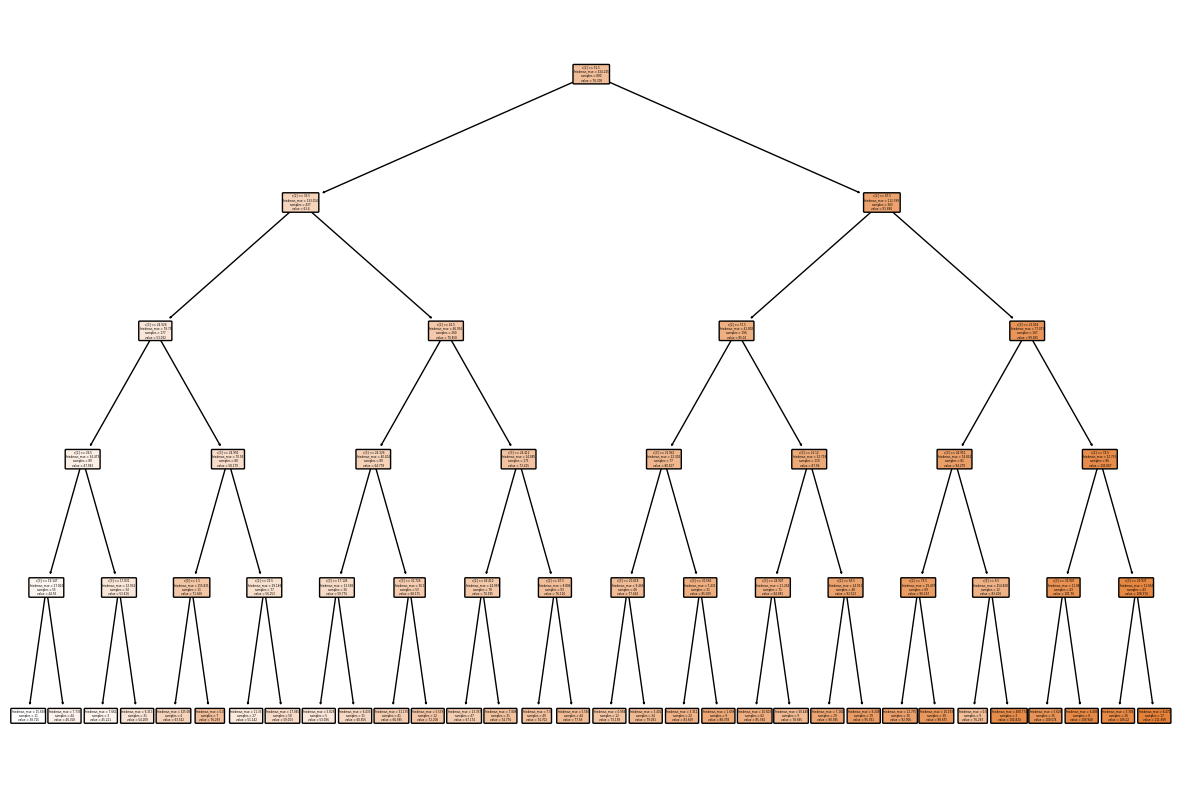

In [ ]:

plt.figure(figsize=(15, 10))
plot_tree(best_model, feature_names=None, class_names=None, filled=True, rounded=True)

**RANDOM FOREST**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Initialize Random Forest Regressor with default hyperparameters
forest_model = RandomForestRegressor(random_state=0)

# Train the Random Forest model using the training data
forest_model.fit(x_train, y_train)


RandomForestRegressor(random_state=0)

In [ ]:
# Make predictions on the test data
y_pred = forest_model.predict(x_test)

# Calculate Mean Squared Error (MSE) and R-squared (R^2) value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mse ** 0.5
print("RMSE", rmse)
print("Mean Squared Error (MSE) with Random Forest:", mse)
print("R-squared (R^2) value with Random Forest:", r2)


RMSE 2.98735114600757
Mean Squared Error (MSE) with Random Forest: 8.924266869552742
R-squared (R^2) value with Random Forest: 0.9724623523702107


**GRADIENT BOOSTING MACHINE (GBM)**

Gradient Boosting Machine (GBM) is a powerful ensemble machine learning technique used for both regression and classification tasks. It builds a strong predictive model by combining multiple weak learners, typically decision trees, in a sequential manner. The key idea is to correct the errors of the previous models by focusing more on the difficult cases in the training data.

How it Works:

Initialize: Start with an initial model, usually a simple model like the mean of the target variable for regression or the log odds for classification.

Iterative Training: At each iteration, fit a new decision tree to the residuals (errors) of the current ensemble model. The residuals represent the difference between the predicted values and the actual values.

Update Model: Add the new tree to the ensemble with a certain weight (learning rate) to minimize the overall error.
Repeat: Repeat the process for a specified number of iterations or until the model converges.

The final prediction is the sum of the predictions from all the individual trees, each weighted by the learning rate.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Initialize Gradient Boosting Regressor with default hyperparameters
gbm_model = GradientBoostingRegressor(random_state=0)

# Train the Gradient Boosting model using the training data
gbm_model.fit(x_train, y_train)


GradientBoostingRegressor(random_state=0)

In [ ]:
# Make predictions on the test data
y_pred = gbm_model.predict(x_test)

# Calculate Mean Squared Error (MSE) and R-squared (R^2) value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mse ** 0.5

print("RMSE", rmse)
print("Mean Squared Error (MSE) with Gradient Boosting:", mse)
print("R-squared (R^2) value with Gradient Boosting:", r2)


RMSE 3.100871222974784
Mean Squared Error (MSE) with Gradient Boosting: 9.615402341473134
R-squared (R^2) value with Gradient Boosting: 0.9703297127519217


**SUPPORT VECTOR MACHINE(SVM)**

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification, regression, and outlier detection. The primary goal of SVM is to find the optimal hyperplane that best separates the data into different classes. This hyperplane is chosen to maximize the margin, which is the distance between the hyperplane and the nearest data points from each class, known as support vectors.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Standardize the features (optional but recommended for SVM)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)



In [ ]:
# Initialize SVR model with default hyperparameters
svm_model = SVR(kernel='rbf')  # 'rbf' kernel is commonly used for non-linear relationships

# Train the SVR model using the scaled training data
svm_model.fit(x_train_scaled, y_train)


SVR()

In [ ]:
# Make predictions on the scaled test data
y_pred = svm_model.predict(x_test_scaled)

# Calculate Mean Squared Error (MSE) and R-squared (R^2) value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mse ** 0.5

print("RMSE", rmse)
print("Mean Squared Error (MSE) with SVM (SVR):", mse)
print("R-squared (R^2) value with SVM (SVR):", r2)


RMSE 10.19677632567588
Mean Squared Error (MSE) with SVM (SVR): 103.97424743586413
R-squared (R^2) value with SVM (SVR): 0.6791662295275076


**K-NEAREST NEIGHBORS(KNN)**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Initialize KNN Regressor with a specified number of neighbors (e.g., k=5)
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Train the KNN model using the scaled training data
knn_model.fit(x_train_scaled, y_train)


KNeighborsRegressor()

In [ ]:
# Make predictions on the scaled test data
y_pred = knn_model.predict(x_test_scaled)

# Calculate Mean Squared Error (MSE) and R-squared (R^2) value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mse ** 0.5

print("RMSE", rmse)
print("Mean Squared Error (MSE) with KNN:", mse)
print("R-squared (R^2) value with KNN:", r2)


RMSE 12.727297141652489
Mean Squared Error (MSE) with KNN: 161.9840925319156
R-squared (R^2) value with KNN: 0.500165007728121


**ANN**

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd

In [ ]:


model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(20,)))
model.add(Dropout(0.2))  # Add dropout for regularization
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [ ]:
x_train_scaled.shape

(800, 20)

In [ ]:
history = model.fit(x_train_scaled, y_train, batch_size=32, epochs=1000, validation_split=0.2)

Epoch 1/1000
20/20 [==============================] - 0s 6ms/step - loss: 2712.4631 - val_loss: 2059.1831
Epoch 2/1000
20/20 [==============================] - 0s 4ms/step - loss: 1718.9502 - val_loss: 1113.5911
Epoch 3/1000
20/20 [==============================] - 0s 3ms/step - loss: 826.0706 - val_loss: 587.8963
Epoch 4/1000
20/20 [==============================] - 0s 4ms/step - loss: 546.6251 - val_loss: 400.4795
Epoch 5/1000
20/20 [==============================] - 0s 5ms/step - loss: 370.6186 - val_loss: 299.7189
Epoch 6/1000
20/20 [==============================] - 0s 4ms/step - loss: 326.6331 - val_loss: 229.4239
Epoch 7/1000
20/20 [==============================] - 0s 3ms/step - loss: 261.9030 - val_loss: 180.4578
Epoch 8/1000
20/20 [==============================] - 0s 4ms/step - loss: 235.3246 - val_loss: 157.2378
Epoch 9/1000
20/20 [==============================] - 0s 4ms/step - loss: 209.9100 - val_loss: 129.1337
Epoch 10/1000
20/20 [==============================] - 0s 4m

In [ ]:
y_pred = model.predict(x_test_scaled)


7/7 [==============================] - 0s 2ms/step


In [ ]:
# Calculate Mean Squared Error (MSE) and R-squared (R^2) value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mse ** 0.5

print("RMSE", rmse)
print("Mean Squared Error (MSE) with ANN:", mse)
print("R-squared (R^2) value with ANN:", r2)

RMSE 7.525283666187727
Mean Squared Error (MSE) with ANN: 56.629894
R-squared (R^2) value with ANN: 0.8252568878235873


**COMPARISON OF MODEL**

In [1]:
import pandas as pd

# Dictionary containing model names and their respective evaluation metrics
evaluation_metrics = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "SVM", "KNN", "ANN"],
    "RMSE": [3.33, 3.09, 2.98, 10.19, 12.72, 7.52],
    "MSE": [11.09, 9.54, 8.92, 103.93, 161.98, 56.62],
    "R-squared": [0.96, 0.97, 0.97, 0.67, 0.50, 0.82]
}

# Create a DataFrame from the evaluation metrics dictionary
evaluation_df = pd.DataFrame(evaluation_metrics)

# Display the DataFrame
print(evaluation_df)


               Model   RMSE     MSE  R-squared
0  Linear Regression   3.33   11.09       0.96
1      Decision Tree   3.09    9.54       0.97
2      Random Forest   2.98    8.92       0.97
3                SVM  10.19  103.93       0.67
4                KNN  12.72  161.98       0.50
5                ANN   7.52   56.62       0.82



**CONCLUSION**

Among the models evaluated, random forest and decision tree perform the best overall, with low RMSE and MSE values and high R-squared values, indicating a good fit to the data.

Linear regression also performs well, showing a strong linear relationship with the target variable.

SVM and KNN demonstrate poorer performance compared to other models, indicating that they may not be well-suited for this dataset.

ANN falls in between, showing moderate performance with relatively lower RMSE and MSE values compared to SVM and KNN, but slightly lower R-squared compared to linear regression, decision tree, and random forest.